In [68]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import sys
sys.path.append('../')
from src.dataset import read_folder
from src.visualization import plot_img

In [34]:
# define Path
PATH = '../LaPa/examples'
# load few examples
images = read_folder(PATH, n = 10)

In [26]:
# plot image with diffrent color palette

def plot_diffrent_color_palette(img_BGR):
    
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_RGB2HSV)
    img_YCrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)
    
    # definie subplots space
    f, ax = plt.subplots(1,4, figsize=(15,5))

    plot_img(img_BGR, ax = ax[0], title = "BGR")
    plot_img(img_RGB, ax = ax[1], title = "RGB")
    plot_img(img_HSV, ax = ax[2], title = "HSV")
    plot_img(img_YCrCb, ax = ax[3], title = "YCrCb")


In [12]:
# choose images to example process
example_img = list(images.keys())[3]

Let's look at the different color palettes depending on the color of the skin and the exposure and quality of the photo.

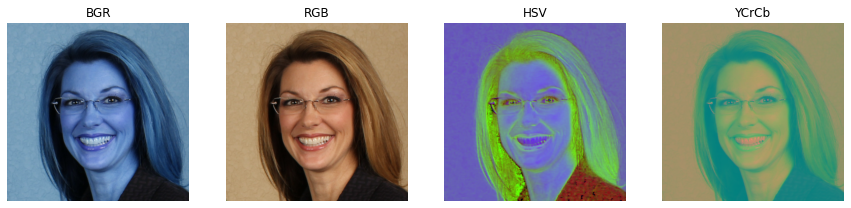

In [27]:
img_BGR = images[example_img]['img']
plot_diffrent_color_palette(img_BGR)

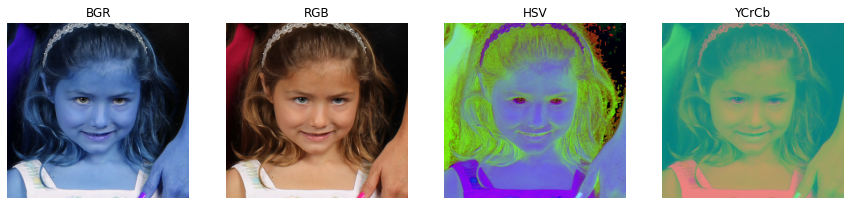

In [29]:
img_BGR = images[list(images.keys())[5]]['img']
plot_diffrent_color_palette(img_BGR)

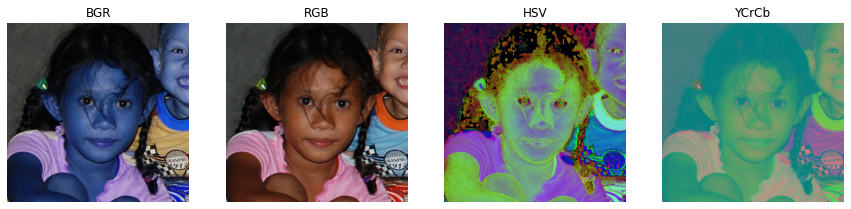

In [43]:
img_BGR = images[list(images.keys())[7]]['img']
plot_diffrent_color_palette(img_BGR)

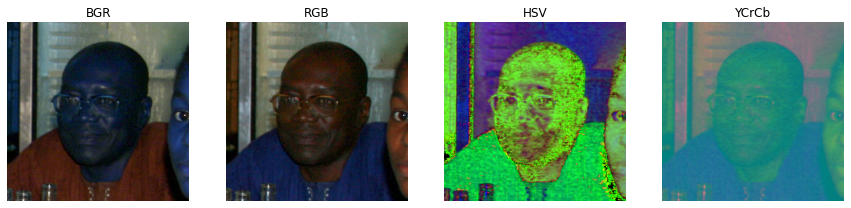

In [44]:
img_BGR = images[list(images.keys())[8]]['img']
plot_diffrent_color_palette(img_BGR)

we have such a large database, let's check how the mean values ​​for the face are distributed for diffrent color palette.

In [54]:
# Firsly load few examples with labels(!)
images = read_folder(PATH, n = 10, labels = 'labels')

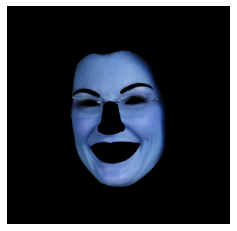

In [102]:
# choose images to example process
example_img = list(images.keys())[3]

# Next, separate a face region that can be interpreted as facial skin (labels = 1)
img = images[example_img]['img']
mask = images[example_img]['labels']
# plot intresing as region
region_img = (mask==1) * img
plot_img(region_img)

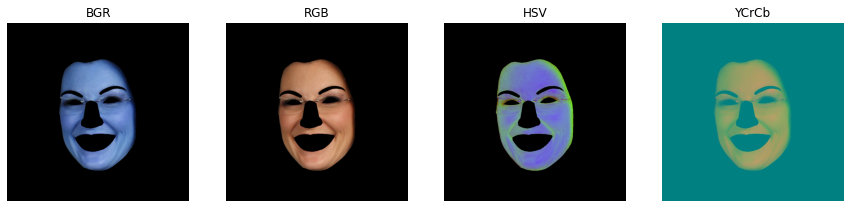

In [57]:
# We can use plot_diffrent_color_palette funtion to show diffrent palette colors
plot_diffrent_color_palette(region_img)

In [58]:
# calcualte avg of region_img

In [156]:
mask_one_channel = mask[:,:,0] == 1
x = region_img[:,:,0][mask_one_channel].mean()
y = region_img[:,:,1][mask_one_channel].mean()
z = region_img[:,:,2][mask_one_channel].mean()

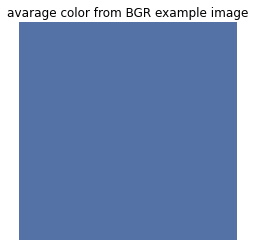

In [163]:
# create image just for new visualization 
avg_img = (x,y,z) * np.ones((2, 2,3))
plt.imshow(avg_img.astype(int))
plt.axis('off')
plt.title('avarage color from BGR example image')
plt.show()

In [175]:
def plot_avg_color(img_BGR, mask_one_channel):
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_RGB2HSV)
    img_YCrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)
    
    _title = ['BGR', 'RGB', 'HSV', 'YCrCb']
    
    # definie subplots space
    f, ax = plt.subplots(1,4, figsize=(15,5))
    
    i=0
    for img_palette_color in [img_BGR, img_RGB, img_HSV, img_YCrCb]:
        x = img_palette_color[:,:,0][mask_one_channel].mean()
        y = img_palette_color[:,:,1][mask_one_channel].mean()
        z = img_palette_color[:,:,2][mask_one_channel].mean()
        
        avg_img = ((x,y,z) * np.ones((2, 2,3))).astype(int)
        
        plot_img(avg_img, ax = ax[i], title = _title[i])
        i+=1


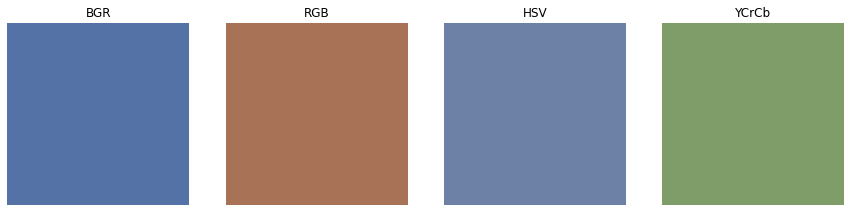

In [176]:
plot_avg_color(region_img,  mask[:,:,0] == 1)